# Analisis Penjualan Properti di NYC

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

### Q : Bagaimana Penjualan Properti di NYC

In [2]:
#Dataset : NYC Property Sales
#this dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

#This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
# BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
# BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
# BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

#Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
# Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
# This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

#### Import Data

In [3]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### Data Type & Treatment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
#Tipe data : Date
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [6]:
#Tipe data : Numeric
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce') # coercing errors to NAs

In [7]:
# Tipe data : Kategorik
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  category      
 2   NEIGHBORHOOD                    84548 non-null  category      
 3   BUILDING CLASS CATEGORY         84548 non-null  category      
 4   TAX CLASS AT PRESENT            84548 non-null  category      
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       84548 non-null  object        
 8   BUILDING CLASS AT PRESENT       84548 non-null  category      
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                84548 non-null  object        
 11  ZI

#### Null Checking & Treatment

In [9]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [10]:
df.drop(['Unnamed: 0','EASE-MENT','APARTMENT NUMBER','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT'], axis=1, inplace=True)

#### Skewness

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

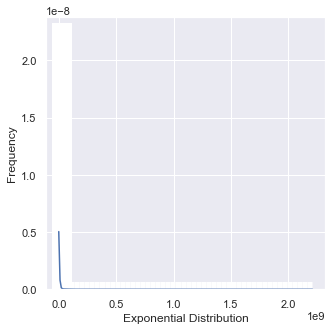

In [11]:
ax = sns.distplot(df[['SALE PRICE','LAND SQUARE FEET','GROSS SQUARE FEET']],
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

In [46]:
#skewness
print(scipy.stats.skew(df['SALE PRICE'], bias=False))
print(scipy.stats.skew(df['LAND SQUARE FEET'], bias=False))
print(scipy.stats.skew(df['GROSS SQUARE FEET'], bias=False))

136.27960105575627
88.30675136968777
72.59066338090749


In [12]:
#Dikarenakan skewness positif saya memakai median sebagai pengganti missing value:
median_sale = df['SALE PRICE'].median()
df['SALE PRICE'].fillna(median_sale, inplace=True)

median_land = df['LAND SQUARE FEET'].median()
df['LAND SQUARE FEET'].fillna(median_land, inplace=True)

median_gross = df['GROSS SQUARE FEET'].median()
df['GROSS SQUARE FEET'].fillna(median_gross, inplace=True)

In [13]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
BLOCK                             0
LOT                               0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

### Measure of Central Tendency

In [24]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,26,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,399,39,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,402,21,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,404,55,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


#### Mean

In [16]:
mean_total = statistics.mean(df['TOTAL UNITS'])
print(mean_total)

2.249183895538629


In [14]:
mean_res = statistics.mean(df['RESIDENTIAL UNITS'])
print(mean_res)

2.0252637554998345


In [15]:
mean_com = statistics.mean(df['COMMERCIAL UNITS'])
print(mean_com)

0.19355868855561337


In [45]:
mean_sale = statistics.mean(df['SALE PRICE'])
print(mean_sale)

1147900.4933174055


#### Median

In [25]:
median_total = statistics.median(df['TOTAL UNITS'])
print(median_total)

1.0


In [26]:
median_res = statistics.median(df['RESIDENTIAL UNITS'])
print(median_res)

1.0


In [28]:
median_com = statistics.median(df['COMMERCIAL UNITS'])
print(median_com)

0.0


#### Modus

In [29]:
mode_borough = scipy.stats.mode(df['BOROUGH'])
print(mode_borough.mode)
print(mode_borough.count)

[4]
[26736]


In [31]:
mode_bc = scipy.stats.mode(df['BUILDING CLASS AT TIME OF SALE'])
print(mode_bc.mode)
print(mode_bc.count)

['R4']
[12989]


### Measure of Spread

#### Range

In [38]:
np.ptp(df['SALE PRICE'])

2210000000.0

In [39]:
min(df['SALE PRICE'])

0.0

In [40]:
max(df['SALE PRICE'])

2210000000.0

#### Variance

In [41]:
var_sale = statistics.variance(df['SALE PRICE'])
var_sale

107756447924221.27

#### Standard Deviation

In [43]:
std_sale = statistics.stdev(df['SALE PRICE'])
std_sale

10380580.326948069

#### Covarian

In [47]:
cov_xy = df['TOTAL UNITS'].cov(df['SALE PRICE'])
cov_xy

20307503.911892675

#### Correlation

In [48]:
corr_matrix = np.corrcoef(df['TOTAL UNITS'], df['SALE PRICE'])
corr_matrix

array([[1.        , 0.10311181],
       [0.10311181, 1.        ]])

#### Probability Distribution

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency')]

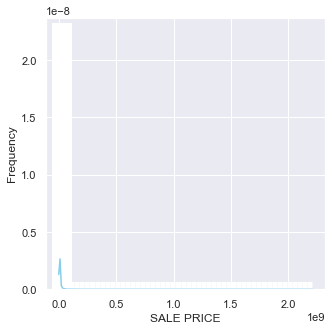

In [62]:
ax = sns.distplot(df['SALE PRICE'],
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(ylabel='Frequency')

In [ ]:
#Terlihat bahwa data harga jual properti di NYC berdistribusi normal dengan positively skewness. Sehingga, ekor distribusi berada di sebelah kanan dan menunjukkan sebagian besar distribusi berada di nilai rendah. Apabila diinterpretasikan, banyaknya properti yang memiliki harga jual di bawah rata-rata menjadi lebih dari 50%. Selain itu, harga jual properti yang representatif dapat diukur dengan nilai median atau kuartil 2. Gap harga jual properti mengalami perbedaan yang signifikan antara properti yang memiliki harga jual tinggi dan properti yang memiliki harga jual rendah

#### Confidence Intervals

In [77]:
df['BOROUGH'] = df['BOROUGH'].replace({1: 'Manhattan',2: 'Bronx', 3:'Brooklyn', 4: 'Queens', 5: 'Staten Island'})

In [79]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].replace({1: 'Class 1',2: 'Class 2', 3:'Class 3', 4: 'Class 4'})

In [80]:
pd.crosstab(df['TAX CLASS AT TIME OF SALE'], df['BOROUGH'])

BOROUGH,Bronx,Brooklyn,Manhattan,Queens,Staten Island
TAX CLASS AT TIME OF SALE,,,,,
Class 1,4404,12665,355,16541,7568
Class 2,2114,9120,16581,8431,480
Class 3,2,0,2,0,0
Class 4,529,2262,1368,1764,362


In [81]:
#Sektor Bronx class 4 berjumlah 529 properti. Perhitungan proporsi:

p_b4 = 529/(4404+2114+2+529)
p_b4

0.07504610583061427

In [82]:
#Sektor Bronx menurut Tax Class at Time of Sale:

n = 4404+2114+2+529
n

7049

In [83]:
#Perhitungan standard error:

se_b = np.sqrt(p_b4 * (1 - p_b4) / n)
se_b

0.0031380536772042267

In [84]:
#Sekarang buat CI menggunakan rumus di atas. z-score adalah 1.96 untuk confidence interval 95%.

z_score = 1.96
lcb = p_b4 - z_score* se_b #lower limit of the CI
ucb = p_b4 + z_score* se_b #upper limit of the CI
lcb, ucb

(0.06889552062329399, 0.08119669103793456)

In [85]:
#Kita dapat menghitungnya menggunakan library 'statsmodels'. Dengan hasil yang sama.

import statsmodels.api as sm
sm.stats.proportion_confint(n * p_b4, n)

(0.0688956336417405, 0.08119657801948804)

#### Hypothesis Testing : D'Agostino's K^2 Normality Test

In [ ]:
#Dikarenakan n>20 maka menggunakan uji normalitas dengan metode D'Agostino's K^2 Normality Test sebagai berikut.

In [88]:
# H0: the sample has a Gaussian distribution.
# H1: the sample does not have a Gaussian distribution.

from scipy.stats import normaltest
stat, p = normaltest(df['SALE PRICE'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=369602.490, p=0.000
Probably not Gaussian


In [ ]:
#Sehingga, distribusi harga penjualan properti tidak berdistribusi normal gaussian. Apabila melihat dari statistik sebelum-sebelumnya, diketahui beridstribusi normally skewness

## Overall Analysis

In [ ]:
# Rata-rata total unit, residensial unit, dan komersial unit yang terjual di pasar properti kota New York secara berturut-turut 2,25, 2,02, dan 0,19 selama periode 12 bulan terakhir sejak data di-publish
# Harga Jual properti memiliki range harga sebesar 2210000000 dengan minimum harga jual 0. Penjualan ini sebenarnya adalah transfer akta antar pihak: misalnya, orang tua mentransfer kepemilikan rumah mereka kepada seorang anak setelah pindah untuk pensiun.
# Nilai harga jual memiliki variance sebesar 107756447924221.27 dan standar deviasi sebesar 10380580.32. Nilai ini mendekati mean = 1147900, sehingga menunjukkan persebaran data harga jual properti yang kecil
# Berdasarkan harga jual properti dan total unit yang terjual, didapatkan nilai korelasi 0.1. Korelasi positif namun lemah, sehingga terdapat hubungan antara kedua variabel tersebut walaupun lemah
# Terlihat bahwa data harga jual properti di NYC berdistribusi normal dengan positively skewness. Sehingga, ekor distribusi berada di sebelah kanan dan menunjukkan sebagian besar distribusi berada di nilai rendah. Apabila diinterpretasikan, banyaknya properti yang memiliki harga jual di bawah rata-rata menjadi lebih dari 50%.
# Harga jual properti yang representatif dapat diukur dengan nilai median atau kuartil 2. Selain itu, gap harga jual properti mengalami perbedaan yang signifikan antara properti yang memiliki harga jual tinggi dan properti yang memiliki harga jual rendah